In [1]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import matplotlib.pyplot as plt
%matplotlib inline
ps = nltk.PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from collections import defaultdict
from string import punctuation
from heapq import nlargest
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /Users/selma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
tweets=pd.read_csv('China_trade.csv', sep='\t')

In [3]:
tweets.head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,Tweet Created At,Tweet Text,User Location,User Name
0,0,0,False,1170805357624606721,Twitter for Android,NaN,1280,False,vetch_tufted,NaN,2019-09-08 21:05:24,RT @JamesMelville: UK’s top trade partners (ex...,"Scotland, United Kingdom",Tufted_Vetch
1,1,0,False,1170805351911972865,Twitter for iPhone,NaN,4791,False,SpannaGattinara,NaN,2019-09-08 21:05:23,RT @MarkHertling: Im confused re the security ...,"Kansas City, MO area",Spanna
2,2,0,False,1170805320647622659,Twitter for iPhone,1.170391e+18,0,False,Winning_Gerald,NaN,2019-09-08 21:05:15,@AgnesNdiritu1 @VP @BorisJohnson Eu has no tra...,NaN,Gerald Lee
3,3,0,False,1170805315090210816,Twitter Web App,NaN,13,False,bissygumdrops,NaN,2019-09-08 21:05:14,RT @RepublicanSwine: #TalibanTrump \n\nWay to ...,NaN,Bissygumdrops
4,4,0,False,1170805305632002051,Twitter for Android,NaN,6,False,NationMostXlnt,NaN,2019-09-08 21:05:12,RT @HarmlessYardDog: Who started the trade war...,rural Ohio,Xlnt Eagle


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
Unnamed: 0           2500 non-null int64
Favorite Count       2500 non-null int64
Favorited            2500 non-null bool
ID                   2500 non-null int64
Phone Type           2500 non-null object
Replied              117 non-null float64
Retweet Count        2500 non-null int64
Retweeted            2500 non-null bool
Screen Name          2500 non-null object
Tweet Coordinates    0 non-null float64
Tweet Created At     2500 non-null object
Tweet Text           2500 non-null object
User Location        1716 non-null object
User Name            2499 non-null object
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 239.3+ KB


# Sentiment analysis on raw data 

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [6]:
tweets['Polarity_score']=tweets['Tweet Text'].apply(sentiment_analyzer_scores)
tweets.head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,Tweet Created At,Tweet Text,User Location,User Name,Polarity_score
0,0,0,False,1170805357624606721,Twitter for Android,NaN,1280,False,vetch_tufted,NaN,2019-09-08 21:05:24,RT @JamesMelville: UK’s top trade partners (ex...,"Scotland, United Kingdom",Tufted_Vetch,0.7506
1,1,0,False,1170805351911972865,Twitter for iPhone,NaN,4791,False,SpannaGattinara,NaN,2019-09-08 21:05:23,RT @MarkHertling: Im confused re the security ...,"Kansas City, MO area",Spanna,0.0258
2,2,0,False,1170805320647622659,Twitter for iPhone,1.170391e+18,0,False,Winning_Gerald,NaN,2019-09-08 21:05:15,@AgnesNdiritu1 @VP @BorisJohnson Eu has no tra...,NaN,Gerald Lee,-0.5994
3,3,0,False,1170805315090210816,Twitter Web App,NaN,13,False,bissygumdrops,NaN,2019-09-08 21:05:14,RT @RepublicanSwine: #TalibanTrump \n\nWay to ...,NaN,Bissygumdrops,-0.3182
4,4,0,False,1170805305632002051,Twitter for Android,NaN,6,False,NationMostXlnt,NaN,2019-09-08 21:05:12,RT @HarmlessYardDog: Who started the trade war...,rural Ohio,Xlnt Eagle,-0.7184


In [7]:
def Sentiment(score):
    if score>0:
        return 'Positive'
    if score<0:
        return 'Negative'
    return 'Neutral'

In [8]:
tweets['Sentiment']=tweets['Polarity_score'].apply(Sentiment)
tweets.head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,Tweet Created At,Tweet Text,User Location,User Name,Polarity_score,Sentiment
0,0,0,False,1170805357624606721,Twitter for Android,NaN,1280,False,vetch_tufted,NaN,2019-09-08 21:05:24,RT @JamesMelville: UK’s top trade partners (ex...,"Scotland, United Kingdom",Tufted_Vetch,0.7506,Positive
1,1,0,False,1170805351911972865,Twitter for iPhone,NaN,4791,False,SpannaGattinara,NaN,2019-09-08 21:05:23,RT @MarkHertling: Im confused re the security ...,"Kansas City, MO area",Spanna,0.0258,Positive
2,2,0,False,1170805320647622659,Twitter for iPhone,1.170391e+18,0,False,Winning_Gerald,NaN,2019-09-08 21:05:15,@AgnesNdiritu1 @VP @BorisJohnson Eu has no tra...,NaN,Gerald Lee,-0.5994,Negative
3,3,0,False,1170805315090210816,Twitter Web App,NaN,13,False,bissygumdrops,NaN,2019-09-08 21:05:14,RT @RepublicanSwine: #TalibanTrump \n\nWay to ...,NaN,Bissygumdrops,-0.3182,Negative
4,4,0,False,1170805305632002051,Twitter for Android,NaN,6,False,NationMostXlnt,NaN,2019-09-08 21:05:12,RT @HarmlessYardDog: Who started the trade war...,rural Ohio,Xlnt Eagle,-0.7184,Negative


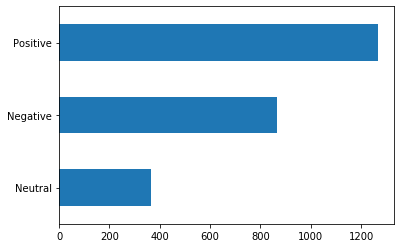

In [9]:
tweets.Sentiment.value_counts().sort_values().plot(kind='barh')

In [10]:
tweets.loc[tweets.Sentiment=='Negative'].head()

,Unnamed: 0,Favorite Count,Favorited,ID,Phone Type,Replied,Retweet Count,Retweeted,Screen Name,Tweet Coordinates,Tweet Created At,Tweet Text,User Location,User Name,Polarity_score,Sentiment
2,2,0,False,1170805320647622659,Twitter for iPhone,1.170391e+18,0,False,Winning_Gerald,NaN,2019-09-08 21:05:15,@AgnesNdiritu1 @VP @BorisJohnson Eu has no tra...,NaN,Gerald Lee,-0.5994,Negative
3,3,0,False,1170805315090210816,Twitter Web App,NaN,13,False,bissygumdrops,NaN,2019-09-08 21:05:14,RT @RepublicanSwine: #TalibanTrump \n\nWay to ...,NaN,Bissygumdrops,-0.3182,Negative
4,4,0,False,1170805305632002051,Twitter for Android,NaN,6,False,NationMostXlnt,NaN,2019-09-08 21:05:12,RT @HarmlessYardDog: Who started the trade war...,rural Ohio,Xlnt Eagle,-0.7184,Negative
7,7,0,False,1170805280772382721,Twitter Web App,NaN,173,False,trawetsla,NaN,2019-09-08 21:05:06,RT @ResistanceNOW77: National Farmers Union VP...,NaN,Al Stewart,-0.5994,Negative
10,10,0,False,1170805258743898112,Twitter Web App,NaN,17,False,kriskoles1,NaN,2019-09-08 21:05:00,RT @TheEconomist: China and America are locked...,NaN,Chris Coles,-0.4939,Negative


# Feature engeneering 

In [11]:
# Number of words
tweets ['word_count']= tweets['Tweet Text'].apply(lambda x: len(str(x).split(" ")))
# Number of Characters 
tweets['char_count'] = tweets['Tweet Text'].str.len()
# average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

tweets['avg_word'] = tweets['Tweet Text'].apply(lambda x: avg_word(x))
# Count Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')


tweets['stopwords_counts'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweets['hastags'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tweets['tags'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tweets['numerics'] = tweets['Tweet Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))





# Clean tweet text to use in Machine learning

In [12]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stop]
    text= [word for word in text  if not word.startswith('#')]
    text=[word for word in text if not word.startswith ('@')]
    text=[word for word in text if word!='rt']
    return text

In [13]:
tweets['Clean_tweet_text']= tweets['Tweet Text'].apply(clean_text)

In [14]:
tweets['Clean_tweet_text'].head()

0    [jamesmelvil, uk, top, trade, partner, export,...
1    [markhertl, im, confus, secur, strategi, leav,...
2    [agnesndiritu1, vp, borisjohnson, eu, trade, d...
3    [republicanswin, talibantrump, way, go, maga, ...
4    [harmlessyarddog, start, trade, war, china, th...
Name: Clean_tweet_text, dtype: object

# TFIDF vector

In [15]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(tweets['Tweet Text'])

In [16]:
X_tfidf

<2500x2711 sparse matrix of type '<class 'numpy.float64'>'
	with 38944 stored elements in Compressed Sparse Row format>

In [17]:
X_features = pd.concat([tweets['word_count'], tweets['char_count'], tweets['avg_word'],tweets['stopwords_counts'], tweets['hastags'],tweets['tags'],tweets['numerics'],  
                        pd.DataFrame(X_tfidf.toarray())], axis=1)


In [18]:
X_features.shape

(2500, 2718)

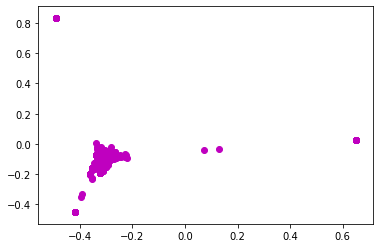

In [19]:
from sklearn.decomposition import PCA

X_dense = X_tfidf.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

# Clustering with Kmean

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
Sum_of_squared_distances = []
see=[]
for n in range (2,10):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X_features)
    y_pred = kmeans.predict(X_features)
    Sum_of_squared_distances.append(kmeans.inertia_)
    see.append([n, silhouette_score(X_features, kmeans.labels_)])
    

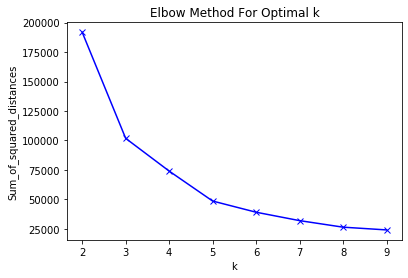

In [22]:
K=range(2,10)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0.5, 1.0, 'Silhouette score Method For Optimal k')

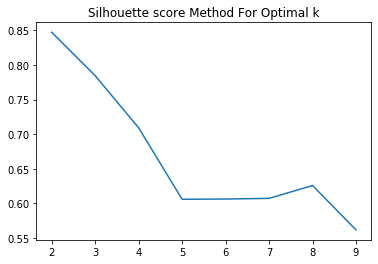

In [23]:
see=pd.DataFrame(see)
plt.plot(see[0],see[1])
plt.title('Silhouette score Method For Optimal k')

both the Elbow method and the silhouette score methode sugest that the optimal k is 3

In [24]:
 kmeans = KMeans(n_clusters=5, random_state=0).fit(X_features)

In [25]:
tweets['cluster']=kmeans.fit_predict(X_features)

In [26]:
tweets['cluster'].value_counts()

1    1241
3     926
0     146
4     114
2      73
Name: cluster, dtype: int64

In [27]:
silhouette_score(X_features, kmeans.labels_)

0.605814523845694

# Word Clouds for each label

In [28]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [29]:
twitter_mask = np.array(Image.open( "./twitter.jpeg"))

In [30]:
stopwords = set(STOPWORDS)

In [31]:
wc = WordCloud(width = 2500,
    height = 2000,background_color="white", max_words=100, 
               stopwords=stopwords, contour_width=3, contour_color='steelblue')


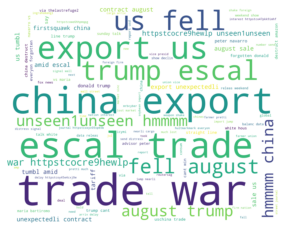

<Figure size 432x288 with 0 Axes>

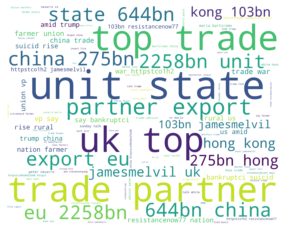

<Figure size 432x288 with 0 Axes>

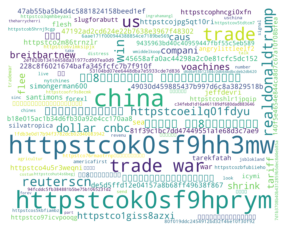

<Figure size 432x288 with 0 Axes>

In [32]:
for n in range (3):
    word_cluster=((tweets.loc[tweets['cluster']==n]['Clean_tweet_text']).apply(lambda x: " ".join (x))).values
    text=" ".join(word_cluster)
    wc.generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    #plt.title('Wordcloud of cluster "{}"'.format(n))
    plt.savefig('cluster{}.png'.format(n))
    #plt.imshow(twitter_mask, cmap=plt.cm.gray, interpolation='bilinear')
    #plt.axis("off")
    plt.show()

# extract most important words in each cluster

In [33]:
# combine text for each cluster
text={}
for i,cluster in enumerate(tweets['cluster']):
    OneCluster = tweets['Tweet Text'][i]
    if cluster not in text.keys():
        text[cluster] = OneCluster
    else:
        text[cluster] += str(OneCluster)

In [34]:
text[2]

'https://t.co/k0SF9hH3mW : 228c8f60-2167-4baf-a345-fcfc7b7f910f🤔 https://t.co/jPG5QT10RY https://t.co/2M86TRNzLrhttps://t.co/k0SF9hprYm : 47ab55ba-5b4d-4c58-8182-4158beed1efehttps://t.co/k0SF9hH3mW : 47192ad2-cd62-4e22-b763-8e3967f48302https://t.co/k0SF9hprYm : 49030d45-9885-437b-997d-6c8a3829518b@jeffdevries @santi_monse @simongerman600 Sea trade with ChinaRT @realDonaldTrump: “U.S. Winning Trade War With China In Dollars.” CNBCRT @ReutersCN: 分析师观点：中国8月出口重回负增长 外需疲弱抢出口提振不明显 https://t.co/EILq01FdYuhttps://t.co/k0SF9hH3mW : de5d5ffd-12e0-4157-a8b6-8ff49638f867https://t.co/k0SF9hprYm : 45658afa-0ac4-4298-a2c0-e81cfc5dc152https://t.co/k0SF9hH3mW : 81f39c1b-c7dd-4744-9551-a1e68d3c7ae9@realDonaldTrump https://t.co/4u5r3WEqNyhttps://t.co/k0SF9hprYm : b18e015a-c1b3-4d6f-b30a-92e4cc170aa8@TarekFatah Flesh trade 2 chinaRT @ReutersCN: 焦点：中国8月出口再转负增长 抢跑效应消退后增速可能再下台阶 https://t.co/PHNCgi0XFNhttps://t.co/k0SF9hH3mW : 9435963b-d40c-4095-9447-fbf55c5eb589RT @realDonaldTrump: “U.S. Winning Trade War Wit

In [35]:
#extract keywords from each cluster
keywords = {}
counts={}
for cluster in range(3):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in stop]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq
    
    

In [36]:
# extract keywords
unique_keys={}
for cluster in range(3):   
    other_clusters=list(set(range(3))-set([cluster]))
    keys_other_clusters=set(keywords[other_clusters[0]]).union(set(keywords[other_clusters[1]]))
    unique=set(keywords[cluster])-keys_other_clusters
    unique_keys[cluster]=nlargest(10, unique, key=counts[cluster].get)

In [37]:
print(unique_keys)

{0: ['%', 'escalates', 'fell', '16', 'hmmmm', 'unseen1_unseen', '//t.co/cre9hewlpsrt', 'contracted', 'escalating', 'sales'], 1: ['$', 'united', 'states', 'top', 'uk', 'partners', '🇨🇳', 'eu', '2018', '64.4bn'], 2: ['//t.co/k0sf9hh3mw', '//t.co/k0sf9hprym', 'realdonaldtrump', 'reuterscn', '外需疲弱抢出口提振不明显', '“', '分析师观点：中国8月出口重回负增长', 'winning', 'dollars.', 'u.s']}


# KNN Clustering

In [38]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X_features , tweets['cluster'], test_size=0.3)

In [40]:
for n in range (3,11, 2):
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    print ('For n=', n)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    print('******************************')      
          
          

For n= 3
[[ 41   0   0   3   2]
 [  0 378   0   0   0]
 [  0   0  20   0   0]
 [  0   0   0 273   0]
 [  0   0   0   0  33]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        46
           1       1.00      1.00      1.00       378
           2       1.00      1.00      1.00        20
           3       0.99      1.00      0.99       273
           4       0.94      1.00      0.97        33

    accuracy                           0.99       750
   macro avg       0.99      0.98      0.98       750
weighted avg       0.99      0.99      0.99       750

******************************
For n= 5
[[ 43   0   0   3   0]
 [  0 377   0   1   0]
 [  0   0  20   0   0]
 [  0   0   0 273   0]
 [  0   0   0   0  33]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       1.00      1.00      1.00       378
           2       1.00      1.00      1.00        20
           3 